# Lab 3 - KNN

## Setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Load and Look at Data

In [5]:
iris = datasets.load_iris()
# print(iris)

## Get X, Y, Names from Dataset

In [3]:
x = iris.data
y = iris.target
names_array = iris.target_names

## Split Data into Train/Test (80/20)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=81)

## K Nearest Neighbors

In [15]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
print(y_test)
print(names_array)

[2 0 2 1 0 0 1 0 2 0 1 1 2 2 0 2 0 0 0 1 1 1 0 0 1 1 1 2 0 0]
['setosa' 'versicolor' 'virginica']


In [17]:
y_test_pred = knn_7.predict(x_test)
print(y_test_pred)

[2 0 2 1 0 0 1 0 2 0 1 1 2 2 0 2 0 0 0 1 1 1 0 0 1 1 1 2 0 0]


In [23]:
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(x, y, test_size=0.30, random_state=72)

In [24]:
knn_7_70 = KNeighborsClassifier(n_neighbors=7)
knn_7_70.fit(x_train_70, y_train_70)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_test_30_pred = knn_7_70.predict(x_test_30)
confusion_matrix(y_test_30, y_test_30_pred)

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 14]])

In [26]:
report_70 = classification_report(y_test_30, y_test_30_pred, target_names=names_array)
print(report_70)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Decision Trees

### Train

In [7]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)

### Test

In [11]:
trees_predict = tree_model.predict(x_test)
print(trees_predict)

[2 0 2 1 0 0 1 0 2 0 1 1 2 2 0 2 0 0 0 1 1 1 0 0 1 1 1 2 0 0]


In [14]:
# Get reports
print(confusion_matrix(y_test, trees_predict))
print(classification_report(y_test, trees_predict, target_names=names_array))

[[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



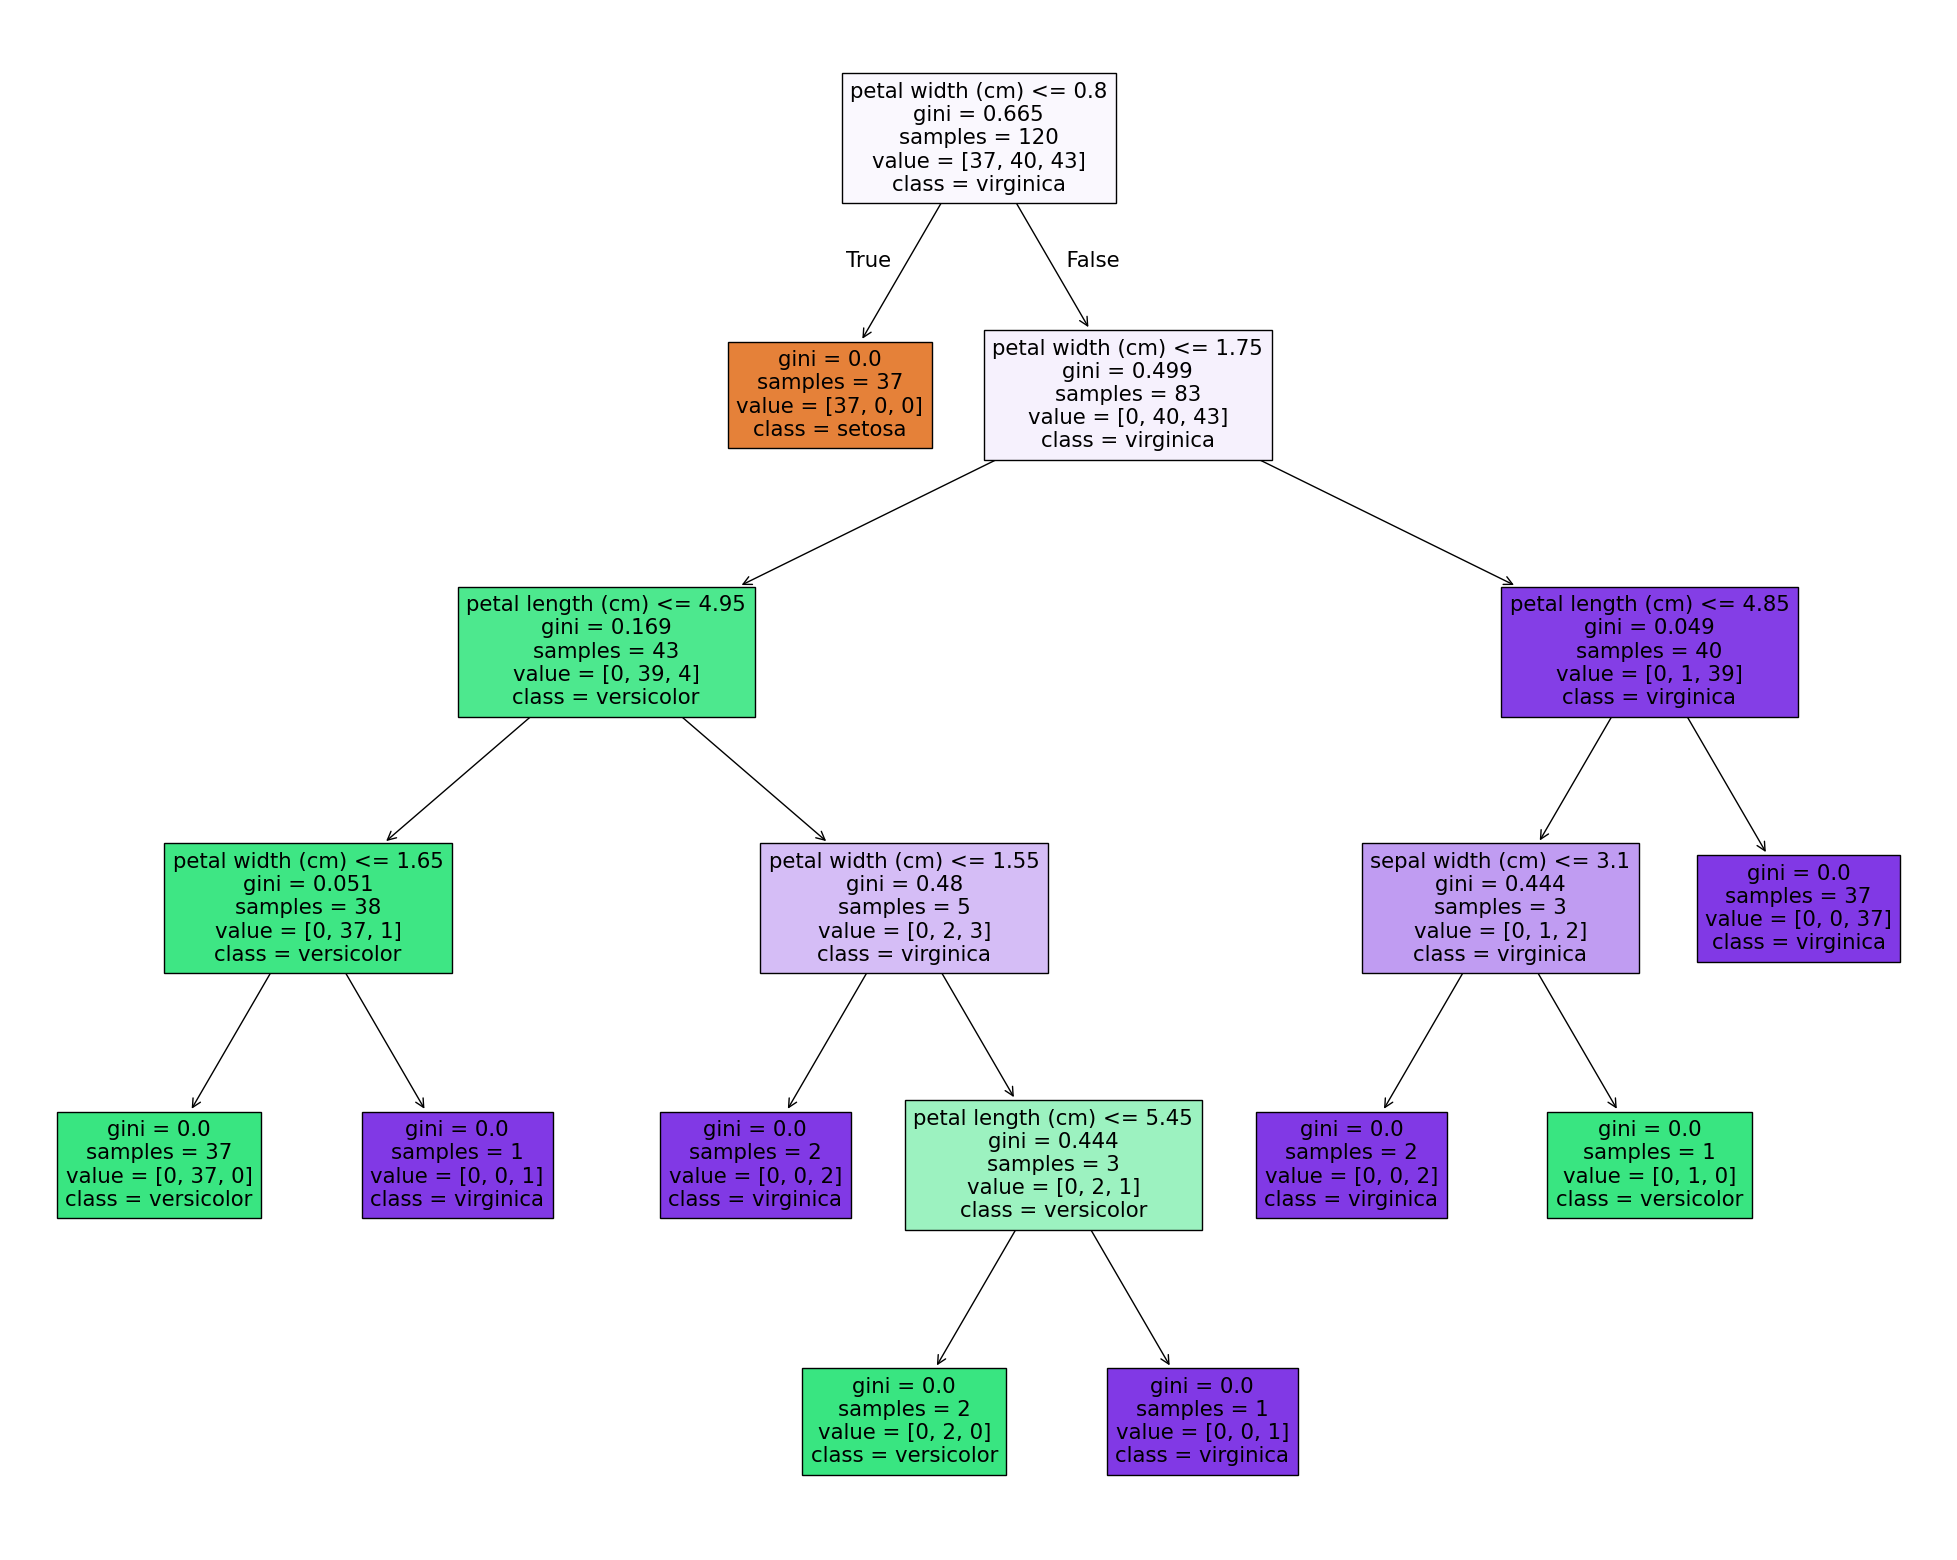

In [9]:
plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, feature_names=iris.feature_names, class_names=names_array, filled=True)

## Logistic Regression

### Train

In [16]:
log_model = LogisticRegression(random_state=73, max_iter=1000).fit(x_train, y_train)

### Test

In [17]:
log_predict = log_model.predict(x_test)
print(log_predict)

[2 0 2 1 0 0 1 0 2 0 1 1 2 2 0 2 0 0 0 1 1 1 0 0 1 1 1 2 0 0]


In [20]:
# Probability estimate for first two rows in test
print(log_model.predict_proba(x_test[:2, :]))
print(log_model.score(x_test, y_test))

[[2.26488714e-07 4.88647118e-03 9.95113302e-01]
 [9.84297518e-01 1.57024519e-02 3.05163140e-08]]
1.0


In [21]:
# Get Reports
print(confusion_matrix(y_test, log_predict))
print(classification_report(y_test, log_predict, target_names=names_array))

[[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Support Vector Machines

### Train

In [23]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

### Test

In [26]:
# Predict for first two values in test
print(svc_model.predict(x_test[:2, :]))

[2 0]


In [29]:
svc_predict = svc_model.predict(x_test)

In [30]:
# Get Reports
print(confusion_matrix(y_test, svc_predict))
print(classification_report(y_test, svc_predict, target_names=names_array))

[[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Artificial Neural Networks

In [8]:
# Train Model
ann = MLPClassifier(random_state=1, max_iter=1000).fit(x_train, y_train) 

In [9]:
# Make Predictions
ann_pred = ann.predict(x_test)
print(ann_pred)

[2 0 2 1 0 0 1 0 2 0 1 1 2 2 0 2 0 0 0 1 1 1 0 0 1 1 1 2 0 0]


In [12]:
# Get Reports
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred, target_names=names_array))
print(ann.score(x_test, y_test))

[[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
